# Dependicies

In [287]:
!pip install anytree
!pip install bitarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports

In [190]:
from anytree.exporter import DotExporter
from PIL import Image
from anytree import Node, RenderTree, NodeMixin
import bitarray
from bitarray import bitarray
from dataclasses import dataclass
import os
import pickle

# DataClass

In [191]:
# Node of a Huffman Tree
@dataclass
class Nodes(NodeMixin):
  def __init__(self,probability, symbol, left = None,right = None):
    self.probability = probability
    self.symbol = symbol
    self.parent = None
    self.left = left
    self.right = right
    if left is not None:
      left.parent = self
    if right is not None:
      right.parent = self
    #the tree direction ( 0/left or 1/right)
    self.code : str = ''

# Functions

In [192]:
""" A supporting function in order to calculate the weights of symbols in specified data """
def CalculateWeights(data : dict):
  symbols = dict()
  for item in data:
    if symbols.get(item) == None:
      symbols[item] = 1
    else:
      symbols[item] += 1
  return symbols

In [193]:
""" A supporting function in order to print the codes of symbols by travelling a Huffman Tree """
def CalculateCodes(the_codes : dict, node : Nodes, value = ''):

  # a huffman code for current node  
  newValue = ''.join((value,node.code))

  if(node.left):
      CalculateCodes(the_codes, node.left, newValue)
  if(node.right):
      CalculateCodes(the_codes, node.right, newValue)

  if(not node.left and not node.right):
      the_codes[node.symbol] = bitarray(newValue)
          
  return the_codes

## Huffman Encoding

In [194]:
def HuffmanEncodingTree(the_data):
    weightTable = CalculateWeights(the_data)

    #Empty Tree
    the_nodes = []

    # converting symbols and probabilities into huffman tree nodes  
    for symbol in weightTable:
      the_nodes.append(Nodes(weightTable[symbol], symbol))

    while len(the_nodes) > 1:  
        # sorting all the nodes in ascending order based on their probability  
        the_nodes = sorted(the_nodes, key = lambda x: x.probability)
        # picking two smallest nodes
        right = the_nodes[0]
        left = the_nodes[1]
        left.code = '0'
        right.code = '1'
        # combining the 2 smallest nodes to create new node  
        newNode = Nodes(left.probability + right.probability, left.symbol + right.symbol, left, right)
        

        the_nodes.remove(left)
        the_nodes.remove(right)
        the_nodes.append(newNode)
        
    return the_nodes[0]

# Data

In [195]:
txt = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus ante turpis, iaculis vitae lacinia at, bibendum sit amet lorem. Cras ac libero consequat purus ultrices vehicula vel vitae quam. Vivamus convallis nibh convallis tellus posuere rhoncus in dapibus nibh. In hac habitasse platea dictumst. Pellentesque sed libero eu magna posuere tempus. Curabitur facilisis, augue et dapibus pharetra, felis nulla tempor turpis, eget dignissim lorem nisl luctus ligula. Vestibulum pellentesque, mi eu congue hendrerit, ipsum erat elementum leo, ut venenatis urna nisl a sem. Maecenas et nunc elit. Maecenas ornare bibendum pulvinar. Aliquam maximus lacinia cursus. Vestibulum nec auctor massa. Aliquam iaculis facilisis lacus, sit amet fringilla nunc mollis nec. Maecenas non mollis tellus.In sit amet enim tincidunt, commodo augue a, consequat ligula. Fusce congue volutpat mi, sed rhoncus risus varius sed. Ut in fringilla lectus. Morbi a arcu sit amet nisl pretium commodo. Aenean imperdiet id erat vel mattis. Quisque tristique vestibulum facilisis. Vestibulum non purus et velit porttitor semper. Etiam ante tortor, ornare ut eros eget, semper fringilla dui. Phasellus fermentum in ligula id ornare. Nulla interdum ex lacus, a vulputate libero mattis ac. Duis dapibus ligula eget elit interdum suscipit.Nunc in dui molestie mi aliquam lobortis non et dui. Maecenas posuere volutpat dictum. Pellentesque sed tortor tristique, cursus nunc vitae, consectetur felis. Donec interdum lectus non egestas aliquam. Cras eget viverra ante. Donec ullamcorper, ex eu cursus dapibus, libero leo tempor mauris, vitae accumsan ex augue id ipsum. In ultrices erat vel aliquet sodales. Etiam vulputate leo sit amet diam bibendum volutpat sed eu purus. Vivamus gravida condimentum lorem at pharetra. Donec accumsan urna nulla, nec pellentesque mi pulvinar nec. Duis et felis blandit, hendrerit lectus quis, aliquam nibh. In dui erat, accumsan id nisi id, iaculis cursus turpis. Morbi condimentum sed odio nec eleifend. Mauris vel quam condimentum, viverra ante ut, maximus sapien.Nulla enim orci, gravida eget odio at, lacinia scelerisque augue. Sed placerat laoreet felis vitae ultrices. Vestibulum eget dui mauris. Fusce pharetra lorem dictum, semper est sed, egestas sapien. Interdum et malesuada fames ac ante ipsum primis in faucibus. Pellentesque eu mi placerat leo laoreet placerat. In hac habitasse platea dictumst. Quisque et ullamcorper libero. Morbi consectetur, lorem et ornare ornare, quam ligula pharetra ligula, in convallis leo leo vel lectus. Aenean iaculis facilisis pulvinar. Curabitur dignissim ante posuere, molestie odio non, suscipit neque. Donec vitae semper lorem. Pellentesque habitant morbi tristique senectus et netus et malesuada fames ac turpis egestas.Donec auctor, odio id imperdiet bibendum, tortor libero imperdiet ligula, at vehicula mauris nibh vel enim. Ut volutpat mauris molestie velit dapibus, ut mattis ipsum dignissim. Donec at metus lectus. Sed condimentum fringilla risus eget consectetur. Donec sem felis, interdum sit amet tristique ac, commodo vitae tellus. Aenean sapien sem, finibus at maximus nec, ornare in dui. Nullam volutpat tincidunt lectus sit amet facilisis."

# Generate

In [276]:
#@title
the_tree_root = HuffmanEncodingTree(txt)
the_codes = dict() 
encoding = CalculateCodes(the_codes,the_tree_root)

# Analysis

## Writing encoding and checking filesize

In [277]:
with open('encoding.pickle', 'wb') as handle:
    pickle.dump(encoding, handle, protocol=pickle.HIGHEST_PROTOCOL)
encoding_file_size = os.path.getsize("encoding.pickle")

## Reading back the encoding file

In [278]:
encoding_read_from_file = None
with open('encoding.pickle', 'rb') as handle:
    encoding_read_from_file = pickle.load(handle)

## Compressing data file

In [279]:
output_bits = bitarray()
output_bits.encode(encoding_read_from_file, txt)
with open('data.bin', 'wb') as handle:
    pickle.dump(output_bits, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [280]:
output_bits_from_file = None
with open('data.bin', 'rb') as handle:
    output_bits_from_file = pickle.load(handle)

In [281]:
compressed_data_with_huffman_encoding = os.path.getsize("data.bin")

## Reading encoding file and decoding

In [282]:
output_text = ''.join(output_bits_from_file.decode(encoding_read_from_file))

## Writing the raw text file and checking filesize

In [283]:
with open('uncompressed.txt', 'wb') as f:
  f.write(txt.encode('ascii'))
total_uncompressed_filesize = os.path.getsize("uncompressed.txt")

## Maths to check the compression ratio

In [284]:
total_compression_ratio = ((encoding_file_size + compressed_data_with_huffman_encoding)/ float(total_uncompressed_filesize) ) * 100
print("{}% ratio".format(round(total_compression_ratio,2)))

81.43% ratio


## Print the text back

In [285]:
print(output_text)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Vivamus ante turpis, iaculis vitae lacinia at, bibendum sit amet lorem. Cras ac libero consequat purus ultrices vehicula vel vitae quam. Vivamus convallis nibh convallis tellus posuere rhoncus in dapibus nibh. In hac habitasse platea dictumst. Pellentesque sed libero eu magna posuere tempus. Curabitur facilisis, augue et dapibus pharetra, felis nulla tempor turpis, eget dignissim lorem nisl luctus ligula. Vestibulum pellentesque, mi eu congue hendrerit, ipsum erat elementum leo, ut venenatis urna nisl a sem. Maecenas et nunc elit. Maecenas ornare bibendum pulvinar. Aliquam maximus lacinia cursus. Vestibulum nec auctor massa. Aliquam iaculis facilisis lacus, sit amet fringilla nunc mollis nec. Maecenas non mollis tellus.In sit amet enim tincidunt, commodo augue a, consequat ligula. Fusce congue volutpat mi, sed rhoncus risus varius sed. Ut in fringilla lectus. Morbi a arcu sit amet nisl pretium commodo. Aenean imperdiet id erat ve

# Graph

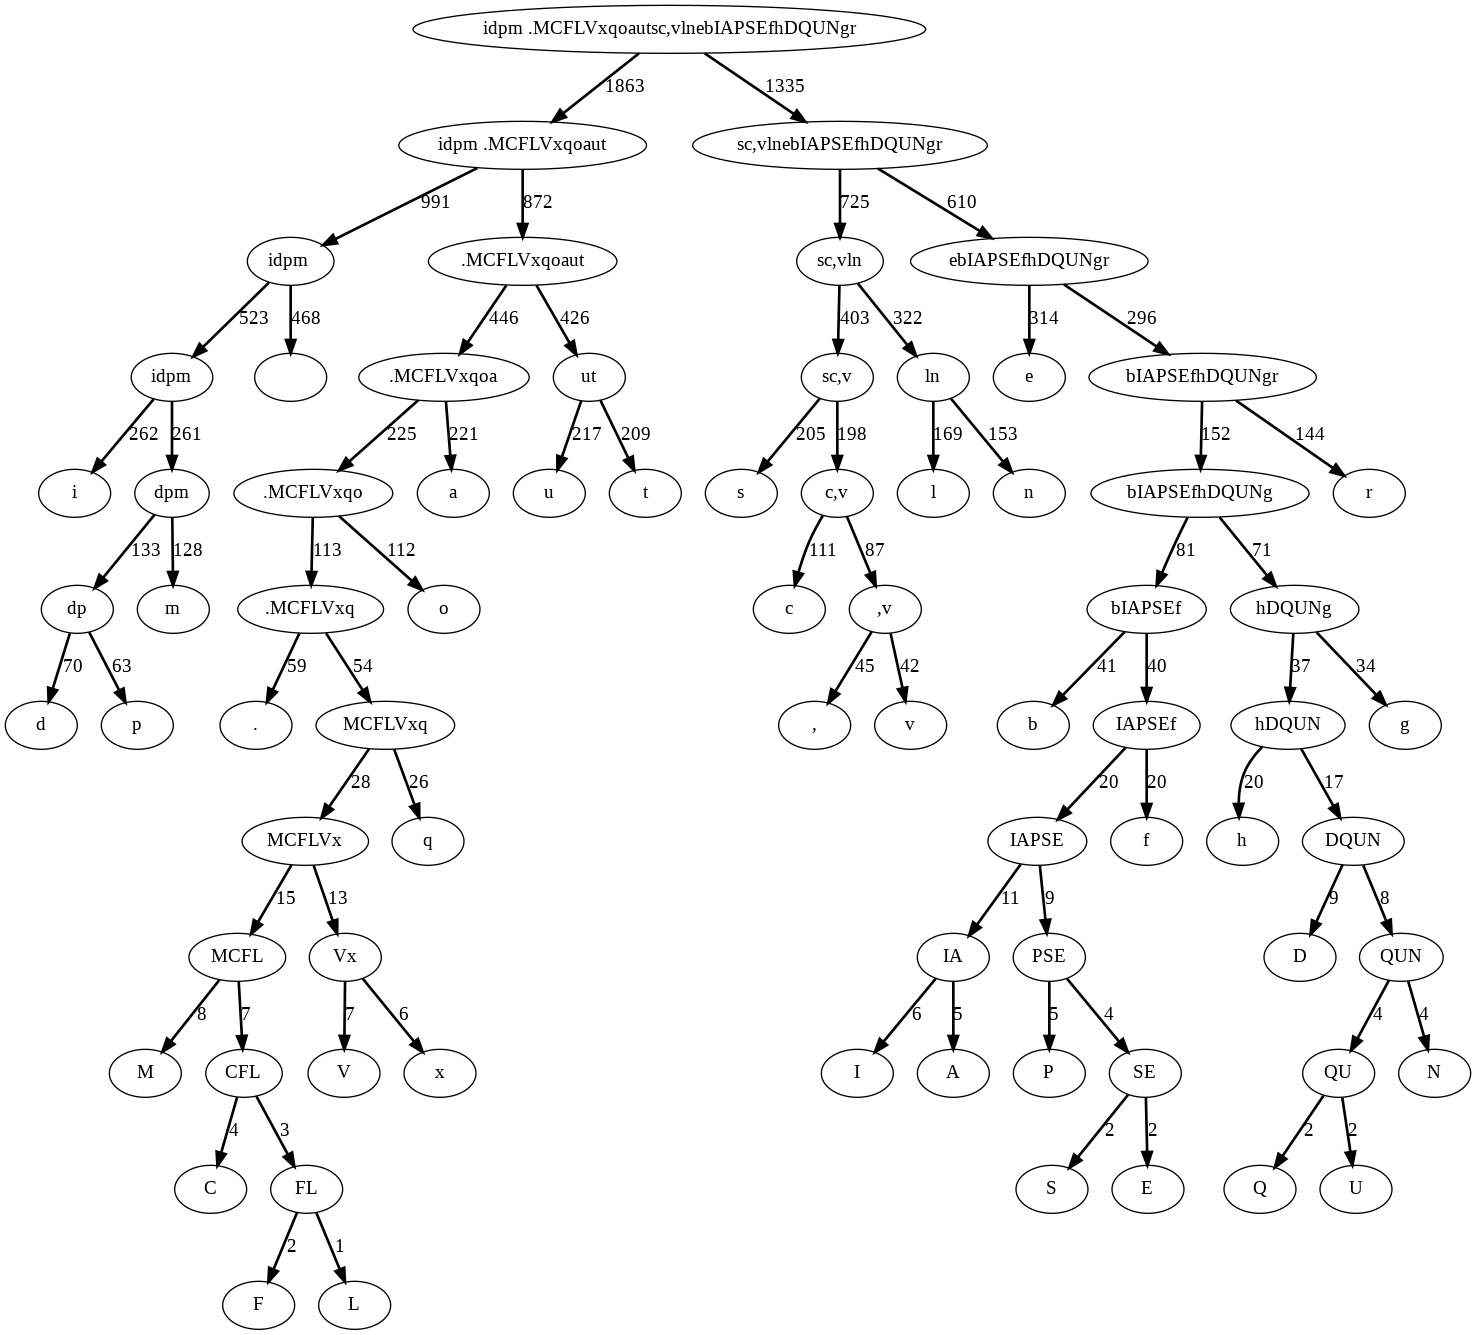

In [286]:
DotExporter(the_tree_root,nodenamefunc=lambda node: node.symbol, edgeattrfunc=lambda parent, child: "style=bold,label=%d" % (child.probability or 0)).to_picture("weight.png")
out = Image.open('weight.png')
display(out)